
# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is a collection of information from around 100k medical appointments to try and pinpoint the reasons why 30% of the appointments made are no-shows and if there are effective ways to predict or categorize if a certain appointment will be a no-show or not.

The data set includes the following information about the patients and the appointments:

1- PatientId: Patient identification.  
2- AppointmentID: Appointment identification.  
3- Gender: Male or Female.  
4- ScheduledDay: The day the patient called to set up the appointment.  
5- AppointmentDay: The day of the appointment. 
6- Age: Patient's age.  
7- Neighbourhood: The location of the appointment.  
8- Scholarship: The patient is enrolled in the Brasilian welfare program Bolsa Família or not.  
9- Hipertension: Determines whether the patient suffers from Hipertension or not.  
10- Diabetes: Determines whether the patient suffers from Diabetes or not.  
11- Alcoholism: Determines whether the patient suffers from Alcoholism or not.  
12- Handcap: Determines whether the patient is Handicap or not.  
13- SMS_received: Indicates whether the patient received a message regarding their appointment or not.  
14- No-show: Indication that the pateint made it to the appointment or a no-show.

### Question(s) for Analysis

####  Q1- Will the number of days between Scheduled day and Appointment day affect the no-show possibility?
####  Q2- Is there a certain age group that can be correlated to no-show appointments? 
####  Q3- Does SMS follow up help reduce the number of no-show appointments?
####  Q4- Does the patients' enrollment to the welfare program related to the no-show appointments? 

In [33]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01   21% |██████▉                         | 2.2MB 30.0MB/s eta 0:00:01    33% |██████████▉                     | 3.5MB 26.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   10% |███▌                            | 1.4MB 26.8MB/s eta 0:00:01    19% |██████▍                         | 2.7MB 27.8MB/s eta 0:00:01    71% |██████████████████████▉         | 9.6MB 21.9MB/s eta 0:00:01    88% |████████████████████████████▏   | 11.8MB 23.2MB/s eta 0:00:01    95% |██████████████████████████████▊ | 12.8MB 26.7MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


### General Properties

We will load the data and try to extract some useful information to help us understand what we're dealing with and clean the data later on as well.

In [34]:
# Reading the CSV file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Time of appointment could have been useful as a factor to include in investigating the reason of No-show Appointments (Maybe late appointments are more likely to be ignored by patients) but since it is not included in the appointment day column it will be cleaned from both date columns.

In [35]:
# Confirming the number of entries
df.shape

(110527, 14)

In [36]:
# Getting a general descritption of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It seems like there is an Age entry of -1 which will need to be assessed and also the Handcap should be a true of false indicator but its Max = 4 means it has other entries other than 0 and 1

In [37]:
# Determining the data type of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [38]:
# Getting the number of missing values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [39]:
# getting the number of duplicate entries
df.duplicated().sum()

0

In [40]:
# Number of unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

It looks like there are patients with more than one appointment 

In [41]:
# Getting the number of males and females that are enrolled in the welfare program

df.query('Gender == "M"')['Scholarship'].value_counts()

0    36679
1     2008
Name: Scholarship, dtype: int64

In [42]:
df.query('Gender == "F"')['Scholarship'].value_counts()

0    62987
1     8853
Name: Scholarship, dtype: int64

There are more appointments made for females and more females than males are enrolled in the welfare program


### Data Cleaning

 

After exploring the data in the Wrangling section, It seems that no missing values are found in any column but we have some illogical values or inconsestincies such as -1 as an age.

In [43]:
# Renaming column names for better handling

df.rename(columns = {'No-show' : 'noShow'}, inplace = True)
df.rename(columns = {'SMS_received' : 'SMS'}, inplace = True)

In [44]:
# Cleaning the dates by removing time and unwanted characters

df['ScheduledDay'] = df['ScheduledDay'].str.split('T').str[0]
df['AppointmentDay'] = df['AppointmentDay'].str.split('T').str[0]

In [45]:
# Replacing illogical values in Age column

df['Age'].replace(-1, 37, inplace = True)
indexDaysLarge_age = df[df['Age'] > 100].index
df.drop(indexDaysLarge_age, inplace= True)

When investigating the -1 age it is found to be only 1 entry with that age so that value will be changed to the mean age which is 37 and we will assume that the age 0 is for new born babies so we will keep it while we will remove every age more than 100 because it could be a mistake and if not a mistake they will be outliers to our data anyway.

In [46]:
# Replacing illogical values in Handcap column

df['Handcap'].replace([2,3,4], 1, inplace = True)

We will assume that anything other than 0 is true which means equal 1 for the Handcap column

In [47]:
# Dropping AppointmentID, Neighbourhood columns
dropped_col = ['AppointmentID','Neighbourhood']
df.drop(dropped_col, axis = 1, inplace = True)

These columns will never be relevant to our analysis

In [48]:
# Adding The number of days between the appointment request and the day of the appointment

df['daysDiff'] = pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])
df['daysDiff'] = df['daysDiff'].astype(str).str.split(' ').str[0]
df['daysDiff'] = df['daysDiff'].astype(int)

In [49]:
# Checking the newly added daysDiff column

df.describe().daysDiff

count    110520.000000
mean         10.183795
std          15.255131
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: daysDiff, dtype: float64

In [50]:
# Removing the rows that has the appointment day set before the scheduled day

indexDays = df[df['daysDiff'] < 0].index
df.drop(indexDays, inplace= True)

In [51]:
# Removing rows with appointments that are after 90 days from appointment request

indexDaysLarge = df[df['daysDiff'] > 90].index
df.drop(indexDaysLarge, inplace= True)


We will assume that any appointment that is more than 90 days away from request is a data entry error or invalid for our analysis

In [52]:
# Final Shape of our file before analysis

df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS,noShow,daysDiff
0,2.987250e+13,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,0


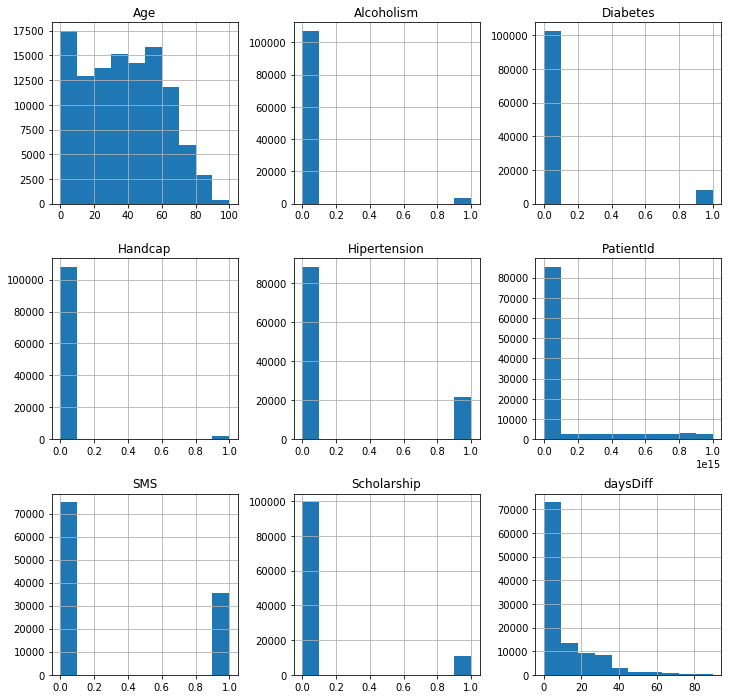

In [53]:
#Histogram for the data file

df.hist(figsize=(12,12));

In [54]:
df['noShow'].value_counts()

No     88043
Yes    22255
Name: noShow, dtype: int64

In [55]:
# Bar plot function

def barplot (x, y, lb, a, b, c):
    plt.bar(x, y, tick_label=lb, width = 0.8)
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c);

In [56]:
# Pie plot function

def pieplot (t, u, v):
    plt.pie(t, labels = u, autopct='%1.1f%%', shadow=True, startangle=60)
    plt.title(v)

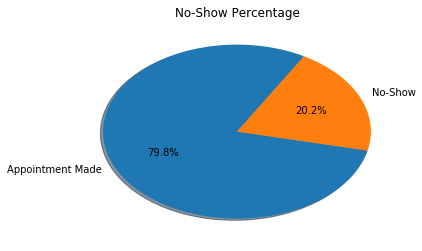

In [57]:
#Plotting the percentage of no-shows in a pie chart

noshow_count = df['noShow'].value_counts()
pieplot(noshow_count, ['Appointment Made', 'No-Show'], "No-Show Percentage")

A percentage of 20% of the total appointments are no-shows while the rest are made by the patients

<a id='eda'></a>
## Exploratory Data Analysis




###  Q1- Will the number of days between Scheduled day and Appointment day affect the no-show possibility ?

In [58]:
# Checking the edited daysDiff column

df.describe().daysDiff

count    110298.000000
mean          9.965521
std          14.382616
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max          90.000000
Name: daysDiff, dtype: float64

In [59]:
# Dividing the daysDiff column into groups

bin_edges = [-1, 1, 7,30 ,60 ,90]
bin_names = ['Within a day', 'Within a week', 'Within a month', 'Within 2 months', 'Within 3 months']
df['period'] = pd.cut(df['daysDiff'], bin_edges, labels=bin_names)
df.groupby('period')['noShow'].value_counts()

period           noShow
Within a day     No        40869
                 Yes        2905
Within a week    No        20312
                 Yes        6657
Within a month   No        20070
                 Yes        9325
Within 2 months  No         5454
                 Yes        2828
Within 3 months  No         1338
                 Yes         540
Name: noShow, dtype: int64

We created the period columns which indicates how long the appointment will be after the request also showing the number of appointemnts made and the no-shows for each period

In [60]:
# Number of No-shows for each period group
df_n = df[df['noShow'] == 'Yes'] # a dataframe filtered on no-show appointments only
noShowsNum = df_n['period'].value_counts()

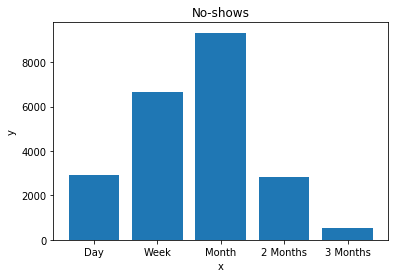

In [61]:
# Bar chart to visualize the number of no-shows for each waiting period

locations = [3, 2, 1, 4, 5]
heights = noShowsNum
labels = ['Month', 'Week', 'Day',  '2 Months', '3 Months']
barplot(locations, heights, labels, 'No-shows', 'x', 'y')

Looks like there is no real correlation between the no-show appointments with the period between scheduling day and the of the appointment but knowing that the histogram for daysDiff is right skewed which means that there are a lot more appointments that are within a day of request so we will need to use percentages instead.

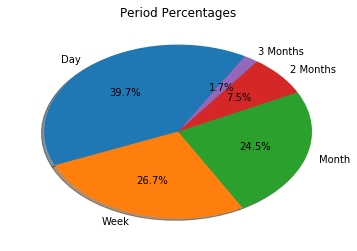

In [62]:
# Pie chart to confirm the number of appointments for each waiting period visually

period_count = df['period'].value_counts()
labels_days_sorted = ['Day', 'Week', 'Month', '2 Months', '3 Months']
pieplot(period_count, labels_days_sorted, "Period Percentages")

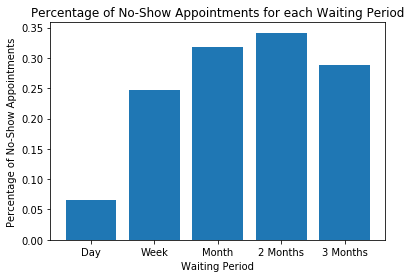

In [63]:
# Bar chart for the percentage of no-shows to the total number of appointments at a certain period

percentage = df_n['period'].value_counts().sort_index() / df['period'].value_counts().sort_index()
bar_title_per = 'Percentage of No-Show Appointments for each Waiting Period'
barplot([1,2,3,4,5], percentage, labels_days_sorted, bar_title_per , 'Waiting Period', 'Percentage of No-Show Appointments')

We can see only 6 percent of the appointments that are booked within a day of the request from the patient end being no-shows while the percentage keeps increasing as the waiting period increases how ever it seems that the no-show percentage starts to decrease after the 2 months threshold but that could be due to the significantly lesser number of samples. 

### Q2- Is there a certain age group that can be correlated to no-show appointments? 

In [64]:
# Getting the Min and Max for Age
bin_edges_age = [-1, 14, 24, 64, 120]
bin_names_age = ['Children', 'Youth', 'Adults', 'Seniors']
df['ageGrp'] = pd.cut(df['daysDiff'], bin_edges_age, labels=bin_names_age)
df.groupby('ageGrp')['noShow'].value_counts()

ageGrp    noShow
Children  No        69542
          Yes       13226
Youth     No         7714
          Yes        3776
Adults    No         9900
          Yes        4865
Seniors   No          887
          Yes         388
Name: noShow, dtype: int64

In [65]:
# Number of No-shows for each period group
df_a = df[df['noShow'] == 'Yes'] # a dataframe filtered on no-show appointments only after adding the ageGrp column

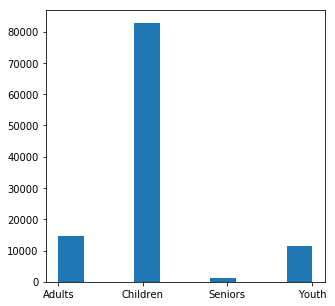

In [66]:
#Histogram to give us an idea of number of appointments for each Age Group

df.ageGrp.hist(figsize=(5,5)).grid(False);

The following is the criteria by which the age groups were made:
1- Children (0-14 Years)
2- Youth (15-24 Years)
3- Adults (25-64 Years)
4- Seniors (65-120 Years)
We can see that a huge number of appointments were made for children so we're better off using percentages of no-shows for visualization to get a more clear idea

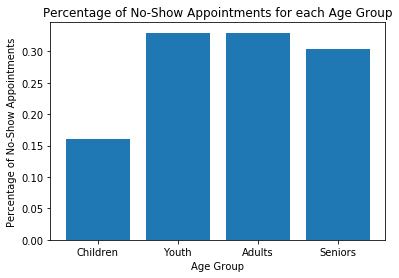

In [67]:
# Creating a bar chart with the percentage 

percentage_age = df_a['ageGrp'].value_counts() / df['ageGrp'].value_counts()
bar_title_age = 'Percentage of No-Show Appointments for each Age Group'
labels_sorted_age = ['Children', 'Adults', 'Youth', 'Seniors']
barplot([1,3,2,4], percentage_age, labels_sorted_age, bar_title_age , 'Age Group', 'Percentage of No-Show Appointments')

There is no clear correlation between a certain age group and the no-show appointments however, It seems that appointments made for children are more likely to be made compared to other age groups

In [68]:
# The average age for no-show appointments

df.groupby('noShow').Age.mean()

noShow
No     37.740729
Yes    34.258189
Name: Age, dtype: float64

The average age of the no-show appointments patients is slightly higher

### Q3- Does SMS follow up help reduce the number of no-show appointments?

In [69]:
# Finding the number of appointments where the patient received an SMS prior

df['SMS'].value_counts()

0    74956
1    35342
Name: SMS, dtype: int64

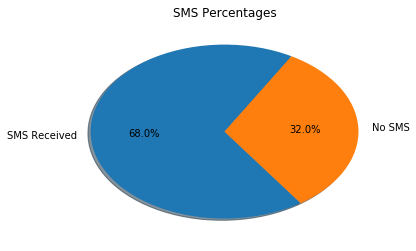

In [70]:
# Pie chart to visualize the percentage of SMS sent for appointments

sms_count = df['SMS'].value_counts()
pieplot(sms_count, ['SMS Received', 'No SMS'], "SMS Percentages")

A percentage of 32% of the appointments had the patients receive no SMS prior

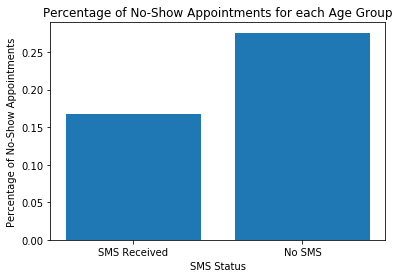

In [71]:
percentage_sms = df_a['SMS'].value_counts() / df['SMS'].value_counts()
bar_title_sms = 'Percentage of No-Show Appointments with SMS status'
labels_sorted_sms = ['SMS Received', 'No SMS']
barplot([1,2], percentage_sms, labels_sorted_sms, bar_title_age , 'SMS Status', 'Percentage of No-Show Appointments')

It seems that when patients receive SMS before an appointment it is less likely that they miss it however, We need to remove the appointments that are requetsed and booked within a day as an SMS wouldn't be that helpful in that case.

In [72]:
# The number of no-shows for each SMS status

df.groupby('SMS')['period'].value_counts()

SMS  period         
0    Within a day       43774
     Within a week      15421
     Within a month     11872
     Within 2 months     3223
     Within 3 months      666
1    Within a month     17523
     Within a week      11548
     Within 2 months     5059
     Within 3 months     1212
Name: period, dtype: int64

We can see that in the case of same day appointments the patients never received SMS which means that our previous conclusion still stands and that SMS follow up is helpful in avoiding no-show appointments

### Q4- Does the patients' enrollment to the welfare program related to the no-show appointments? 

In [73]:
# Finding the number of appointments where the patient is enrolled to the program

df['Scholarship'].value_counts()

0    99451
1    10847
Name: Scholarship, dtype: int64

A large number of appointments are made by patients that are not enrolled in the program

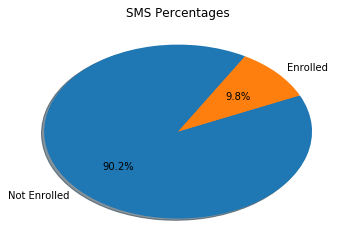

In [74]:
# Pie chart to visualize the percentage of appointments made by patients enrolled in the program

sch_count = df['Scholarship'].value_counts()
pieplot(sch_count, ['Not Enrolled', 'Enrolled'], "SMS Percentages")

Only 9.8 percent are enrolled in the welfare program

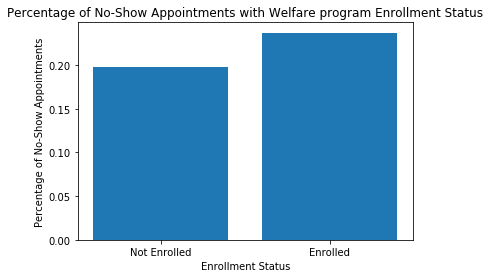

In [75]:
percentage_sch = df_a['Scholarship'].value_counts() / df['Scholarship'].value_counts()
bar_title_sch = 'Percentage of No-Show Appointments with Welfare program Enrollment Status'
labels_sorted_sch = ['Not Enrolled', 'Enrolled']
barplot([1,2], percentage_sch, labels_sorted_sch, bar_title_sch , 'Enrollment Status', 'Percentage of No-Show Appointments')

It's a very close percentage for both enrolled and not enrolled patients but maybe if we add age groups to the mix we could get a better idea

In [76]:
df.groupby('ageGrp')['Scholarship'].value_counts()

ageGrp    Scholarship
Children  0              74347
          1               8421
Youth     0              10295
          1               1195
Adults    0              13585
          1               1180
Seniors   0               1224
          1                 51
Name: Scholarship, dtype: int64

Most enrollments in the welfare program are made for children

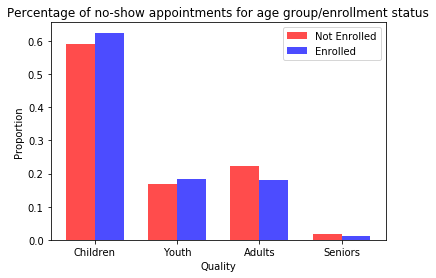

In [77]:
# Now we will plot the percentage of enrolled no-shows across each age group

df_k = df[df['noShow'] == 'Yes']
counts_s = df_k.groupby(['Scholarship', 'ageGrp']).count()['Age']
counts_totals = df_k.groupby('Scholarship').count()['Age']
not_enr = counts_s[0]/counts_totals[0]
enr = counts_s[1]/counts_totals[1]
ind = np.arange(len(enr))  # the x locations for the groups
width = 0.35       # the width of the bars
not_enr_bars = plt.bar(ind, not_enr, width, color='r', alpha=.7, label='Not Enrolled');
enr_bars = plt.bar(ind + width, enr, width, color='b', alpha=.7, label='Enrolled');

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Percentage of no-show appointments for age group/enrollment status')
locations = ind + width / 2  # xtick locations
labels = ['Children', 'Youth', 'Adults', 'Seniors']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();


Unfortunately the percentages between the enrolled and not enrolled no-show patients across the four age groups are still close, Maybe the only takeaway from this is that enrolled seniors and adults are less likely to not make their appointments while for children and youth it is the other way around but these are all very small margins that might not be most reliable.

<a id='conclusions'></a>
## Conclusions

Finally, we can conclude that waiting time between requesting the appointment and the actual appointment day can affect the       possibility of no-show appointments occurring and decreasing that wait time can help with avoiding that issue.

Another great solution for the no-show problem is the SMS follow up prior to the appointment as it seems a lot of these missed appointments are due to patinets forgetting the appointment dates or at least shows that the medical facility cares enough which is a good sign that could help make the patients feel more assured if there was any hesitation from the patient's side

Age groups had no clear correlation with no-show appointments however the average age of no-show appointments' patients is higher than the average age of patients that made their appointments
There is almost no correlation between no-show appointments with eenrollment status in the welfare program even across all age groups.

One limitation on this analysis of the data is that we didn't dive deeper into the fact that their are multiple appointments made by the same patients. 

We don't know if these multiple appointments by certain patients are made due to certain medical conditions or due to the fact that they frequently don't show up for their appointments.





In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0